In [78]:
import pandas as pd

In [79]:
sample = pd.read_json("data/rawdata/VibrationBasic4_1_1605042776432_1606172400000.json")

In [80]:
s2 = sample[["time", "values"]]

In [81]:
s2['g_C'] = s2['values'].apply(lambda x: ','.join(map(str, x)))

<ipython-input-81-767967c45c57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g_C'] = s2['values'].apply(lambda x: ','.join(map(str, x)))


In [82]:
s2[['g','C']] = s2['g_C'].str.split(',',expand=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [83]:
s2

,time,values,g_C,g,C
0,1605042869986,"[2.281, 29]","2.281,29",2.281,29
1,1605042870987,"[1.786, 29]","1.786,29",1.786,29
2,1605042871987,"[1.3860000000000001, 29]","1.3860000000000001,29",1.3860000000000001,29
3,1605042872979,"[1.548, 29]","1.548,29",1.548,29
4,1605042873975,"[0.866, 29]","0.866,29",0.866,29
...,...,...,...,...,...
40520,1606171905559,"[0.03, 24]","0.03,24",0.03,24
40521,1606172025871,"[0.032, 24]","0.032,24",0.032,24
40522,1606172146192,"[0.038, 24]","0.038,24",0.038,24
40523,1606172266521,"[0.03, 25]","0.03,25",0.03,25


In [84]:
s2.dtypes

time       int64
values    object
g_C       object
g         object
C         object
dtype: object

In [85]:
s2['g'] = s2['g'].astype(float)

<ipython-input-85-8ee4d752cfa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g'] = s2['g'].astype(float)


<AxesSubplot:>

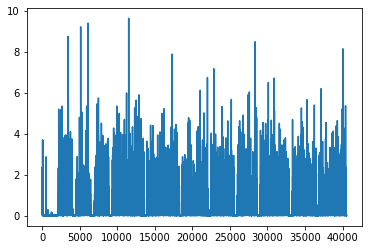

In [86]:
s2["g"].plot()

In [87]:
s2["g2"] = s2["g"].copy

<ipython-input-87-5b6b54f0c412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2["g2"] = s2["g"].copy


In [88]:
s2["g2"] = s2[s2["g"] > 0.1]

<ipython-input-88-9fbbb6f0a7dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2["g2"] = s2[s2["g"] > 0.1]


In [89]:
s2["g2"]

0        1.60504e+12
1        1.60504e+12
2        1.60504e+12
3        1.60504e+12
4        1.60504e+12
            ...     
40520            NaN
40521            NaN
40522            NaN
40523            NaN
40524            NaN
Name: g2, Length: 40525, dtype: object

In [90]:
s2.columns

Index(['time', 'values', 'g_C', 'g', 'C', 'g2'], dtype='object')

In [91]:
s2.iloc[:, 0::3]

,time,g
0,1605042869986,2.281
1,1605042870987,1.786
2,1605042871987,1.386
3,1605042872979,1.548
4,1605042873975,0.866
...,...,...
40520,1606171905559,0.030
40521,1606172025871,0.032
40522,1606172146192,0.038
40523,1606172266521,0.030


In [92]:
s3 = s2[["time", "g"]]

In [93]:
s3["datetime"] = pd.to_datetime(s3["time"], unit="ms").dt.tz_localize('UTC').dt.tz_convert('Europe/Oslo')

<ipython-input-93-bad483c66c04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3["datetime"] = pd.to_datetime(s3["time"], unit="ms").dt.tz_localize('UTC').dt.tz_convert('Europe/Oslo')


In [94]:
s3['year'] = s3['datetime'].dt.year

<ipython-input-94-68b90f55cbef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3['year'] = s3['datetime'].dt.year


In [95]:
s3['month'] = s3['datetime'].dt.month

<ipython-input-95-0b5323bd37de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3['month'] = s3['datetime'].dt.month


In [96]:
s3['day'] = s3['datetime'].dt.day

In [97]:
s3['week'] = s3['datetime'].dt.weekofyear

<ipython-input-97-97d57d7bf4ce>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  s3['week'] = s3['datetime'].dt.weekofyear


In [98]:
s3['weekday'] = s3['datetime'].dt.dayofweek

In [99]:
s3['Weekday'] = s3['datetime'].dt.strftime("%A")

KeyboardInterrupt: 

In [ ]:
s3['hour'] = s3['datetime'].dt.hour

In [ ]:
s3['minutes'] = s3['datetime'].dt.minute

In [ ]:
s3['ones'] = 1

In [ ]:
i = 0

k = 0

l = 0

for index, row in s3.iterrows():
    if (i < 10):
        #print(row["datetime"])
        #print(row["weekday"])
        #print(row["g"])
        i += 1
    if (row["g"] > 0.1):
        k += 1
        if (k > l):
            l = k
            if (l > 135):
                print("l", l)
                print()
                print(row["g"])
                print(row["datetime"])
                print(row["weekday"])
    else:
        k = 0

print("k", k)
print("l", l)


In [ ]:
s3 = s3.set_index('datetime')

In [ ]:
s3 = s3.drop("time", axis=1)